In [2]:
#CNN-Mnist Fashion

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import load_model
import os

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
#Now we will use train test 
(train_images,train_labels),(test_images,test_labels) \
 = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
### here we have menstioned maily the descriptions of the dataset
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
#lets check the shape of train_images
train_images.shape

(60000, 28, 28)

In [9]:
#lets check the content of the images
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
#lets check the shape of the labels
train_labels.shape

(60000,)

In [11]:
#lets check the content of the labels 
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
#lets check the shape of test_images shape
test_images.shape

(10000, 28, 28)

In [13]:
#lets check the content of the images
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

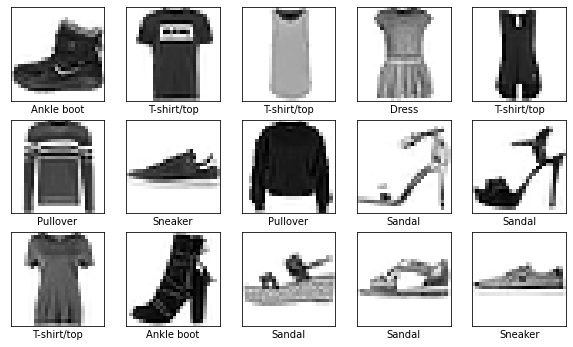

In [14]:
#lets plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [15]:
#Now we will do the reshaping 
train_images=train_images.reshape((60000,28,28,1))

In [16]:
test_images=test_images.reshape((10000,28,28,1))

In [18]:
#Now we will do the scaling
train_images=train_images/255.0
test_images=test_images/255.0

In [19]:
#Now we will create our first convolution layers
conv1=layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))

In [20]:
#Now we will add second convolution layers
#we will add 64 neurons in this
conv2=layers.Conv2D(64 , (3,3),activation='relu')

In [21]:
#Third convolution layers
#we will add 128 neurons in this
conv3=layers.Conv2D(128 , (3,3), activation='relu')

In [22]:
#Now we will create a max pooling 
#we need to create max pooling after every convolution layer
max_pooling1=layers.MaxPool2D(2,2)

In [23]:
#now we will create a Flattend
flat_layers=layers.Flatten()

In [24]:
#Now we will contruct a ANN / Multi layer Nueral Network
ann_h1=layers.Dense(128,activation='relu')

In [25]:
#Now we will create final output layers
output_layer=layers.Dense(10,activation='softmax')

In [26]:
#cretae a Sequantials
model=models.Sequential()

In [27]:
#lets add all the models 
model=models.Sequential()
model.add(conv1)
model.add(conv2)
model.add(conv3)

model.add(flat_layers)
model.add(ann_h1)
model.add(output_layer)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 61952)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7929984   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 8,023,946
Trainable params: 8,023,946
Non-trainable params: 0
____________________________________________